In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook
import sys

# ACDC utils
sys.path.append('/workspace/DQTools')
from utils import *

/opt/tljh/user/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Assimila Change Detection for Coastlines - ACDC

### Get data using DQTools - data transferred to the client side
- The client only needs to install Assimila DQTools

In [6]:
# How to work with a Dataset object
Dataset?

In [2]:
# Get DQTools dataset object for band 2 - red
b2 = Dataset(product='S2_SR', subproduct='B2', tile='OS')

# Get dataset object for Assimila Cloud Mask
acm = Dataset(product='S2_SR', subproduct='ACM', tile='OS')

In [3]:
b2

<DQ Dataset: S2_SR-B2>
Product:        S2_SR
Sub-product:    B2
Surface reflectance centered at 490nm at 10m spatial resolution

Tiles:
    In datacube:    ['OS']
    Selected tile:  OS

Timesteps available:
    First:          2018-01-02 00:00:00
    Last:           2020-12-30 00:00:00
    Frequency:      5 days

Last Gold:          2020-12-30 00:00:00
Data:
None
        

In [4]:
# How can you get data?
b2.get_data?

In [7]:
# Get data for a single time step
start=dt.datetime(2020, 1, 2)
stop=dt.datetime(2020, 1, 2)

b2.get_data(start=start, stop=stop)
acm.get_data(start=start, stop=stop)

In [9]:
b2.data

<xarray.Dataset>
Dimensions:    (latitude: 3910, longitude: 12598, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-02
  * latitude   (latitude) float64 5.887e+06 5.887e+06 ... 5.848e+06 5.848e+06
  * longitude  (longitude) float64 6.676e+05 6.676e+05 ... 7.935e+05 7.935e+05
Data variables:
    B2         (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    transform:      [667560.0, 10.0, 0.0, 5886640.0, 0.0, -10.0]
    crs:            +init=epsg:32630
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    AREA_OR_POINT:  Area
    last_gold:      2020
    product:        S2_SR
    version:        Sen2Cor

The Assiimla Data Cube uses [xarrays](http://xarray.pydata.org/en/stable/) to handle multidimensional datasets!

<IPython.core.display.Javascript object>


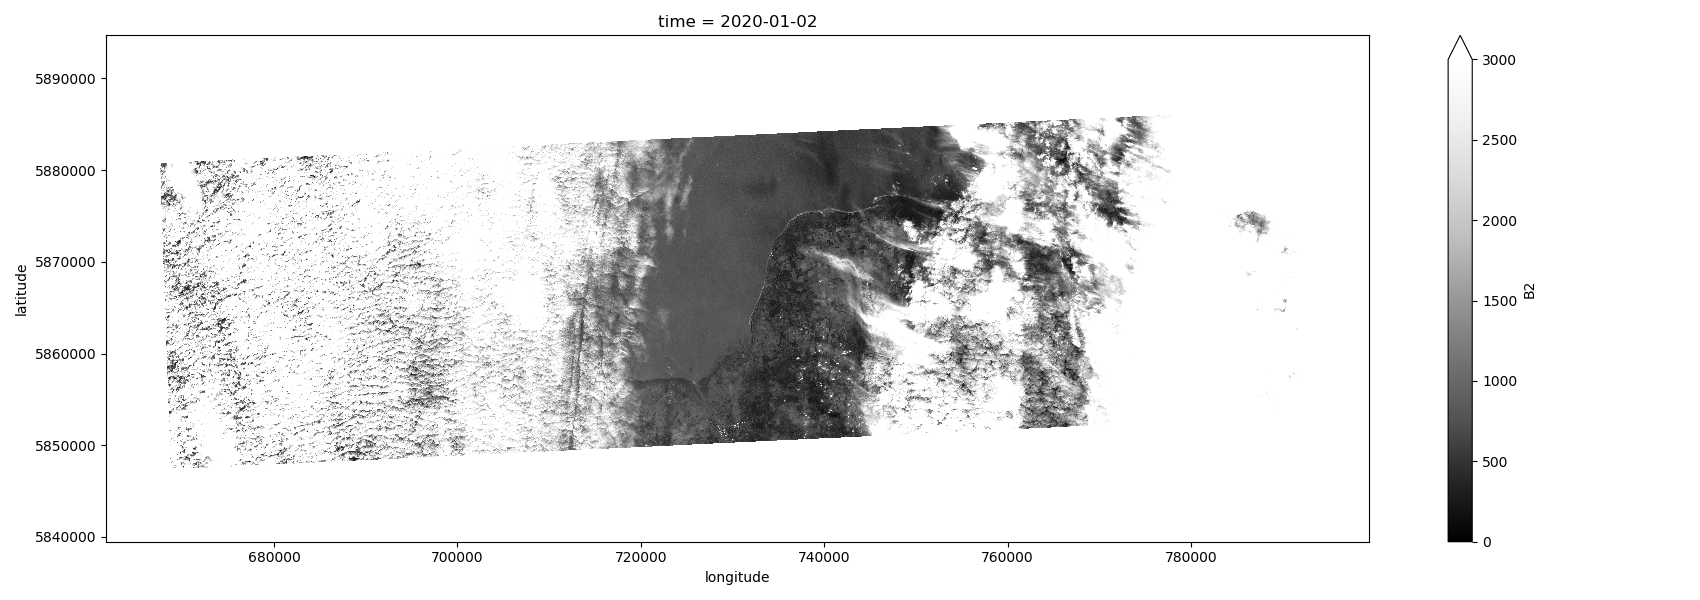

In [13]:
# Plot some data
fig, ax = plt.subplots(figsize=(17,6))

b2.data.B2[0].plot.imshow(ax=ax, cmap='Greys_r', vmin=0, vmax=3000)

plt.axis('equal')
plt.tight_layout()
plt.show()

#### Apply Assimila Cloud Mask (ACM)

<IPython.core.display.Javascript object>


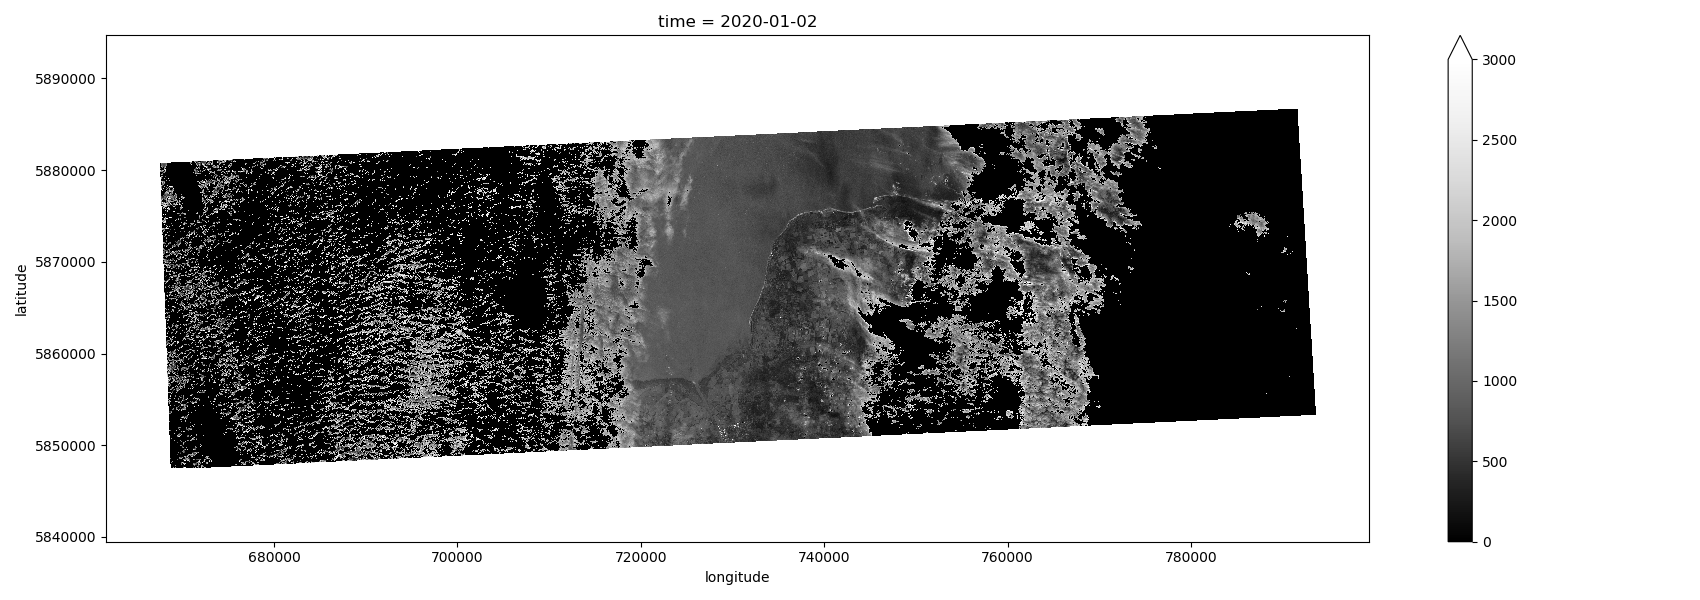

In [14]:
fig, bx = plt.subplots(figsize=(17,6))

(b2.data.B2[0] * (acm.data.ACM[0] == 0)).plot.imshow(ax=bx, cmap='Greys_r', vmin=0, vmax=3000)

plt.axis('equal')
plt.tight_layout()
plt.show()